# Title : Weather App

 - Goal : Create a report of the weather for the next 10 days.

 - Credits : 10Alytics. [Youtube Video](https://www.youtube.com/watch?v=Z1AP9RBkUU0&t=1904s)

 - Cities list : https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://openweathermap.org/storage/app/media/cities_list.xlsx&ved=2ahUKEwii6aHDm4qKAxUOLdAFHcUgBVYQFnoECB8QAQ&usg=AOvVaw0zUV3G8tfM-rUMkSRC6u-E

## Pre-requisits

1.- Python env to code

2.- OpenWeather Account (it's free)

3.- PostgreSQL

 ### 1.- Import Libraries

In [55]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine

### 2.- Get weather data from API

In [11]:
api_key = ''
city = 'Mexico City,MX'
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&cnt=240&appid={api_key}" # 240 hours = 10 days

response = requests.get(url)

In [15]:
# print response to make sure everything is ok

# data = response.json()
# json_str = json.dumps(data, indent = 4)
# print(json_str)

### Since Weather data will be in Kelvin we need to transform it to Celsius

In [17]:
# Weather information is in Kelvin so transforming to celsius

def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

### 3.- Transform the Json to a dataframe

In [32]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = datetime.fromtimestamp(hour['dt'])
        temp = kelvin_to_celsius(hour['main']['temp'])
        feels_like = kelvin_to_celsius(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg']
        clouddiness = hour['clouds']['all']
        rain_volume = hour.get('rain', {}).get('3h', 0)
        snow_volume = hour.get('snow', {}).get('3h', 0)

        weather_data.append(
            {
                "DateTime" : date_time,
                "Tempeture" : temp,
                "Feels Like_temp" : feels_like,
                "Pressure(hPa)" : pressure,
                "Humidity_Percent" : humidity,
                "Weather" : weather_main,
                "Weather Description" : weather_description,
                "Wind Speed" : wind_speed,
                "Wind Direction" : wind_direction,
                "Cloudiness" : clouddiness,
                "Rain Volume(mm)" : rain_volume,
                "Snow Volume(mm)" : snow_volume
            })

        df = pd.DataFrame(weather_data)
else:
    print(f'Failed to get data : {response.status_code}')
        

In [52]:
# Showing df

df

,DateTime,Tempeture,Feels Like_temp,Pressure(hPa),Humidity_Percent,Weather,Weather Description,Wind Speed,Wind Direction,Cloudiness,Rain Volume(mm),Snow Volume(mm),Day,Hour
0,2024-12-02 18:00:00,22.75,21.37,1016,11,Clear,clear sky,2.83,17,0,0,0,2024-12-02,18
1,2024-12-02 21:00:00,20.76,19.52,1018,24,Clouds,few clouds,3.12,359,16,0,0,2024-12-02,21
2,2024-12-03 00:00:00,17.29,16.28,1021,46,Clouds,few clouds,2.81,1,17,0,0,2024-12-03,0
3,2024-12-03 03:00:00,12.45,11.58,1024,70,Clouds,few clouds,2.22,3,14,0,0,2024-12-03,3
4,2024-12-03 06:00:00,11.84,10.88,1025,69,Clouds,few clouds,1.82,9,17,0,0,2024-12-03,6
5,2024-12-03 09:00:00,12.72,11.67,1026,62,Clear,clear sky,2.13,17,0,0,0,2024-12-03,9
6,2024-12-03 12:00:00,17.39,16.10,1023,35,Clear,clear sky,2.42,19,0,0,0,2024-12-03,12
7,2024-12-03 15:00:00,20.43,19.08,1018,21,Clouds,broken clouds,2.39,341,84,0,0,2024-12-03,15
8,2024-12-03 18:00:00,19.43,18.24,1018,31,Clouds,broken clouds,4.62,24,62,0,0,2024-12-03,18
9,2024-12-03 21:00:00,15.51,14.60,1023,57,Clouds,few clouds,3.89,1,15,0,0,2024-12-03,21


In [53]:
# Showing df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DateTime             40 non-null     datetime64[ns]
 1   Tempeture            40 non-null     float64       
 2   Feels Like_temp      40 non-null     float64       
 3   Pressure(hPa)        40 non-null     int64         
 4   Humidity_Percent     40 non-null     int64         
 5   Weather              40 non-null     object        
 6   Weather Description  40 non-null     object        
 7   Wind Speed           40 non-null     float64       
 8   Wind Direction       40 non-null     int64         
 9   Cloudiness           40 non-null     int64         
 10  Rain Volume(mm)      40 non-null     int64         
 11  Snow Volume(mm)      40 non-null     int64         
 12  Day                  40 non-null     object        
 13  Hour                 40 non-null     

In [44]:
# Convert Datetime from Object to Datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract day and hour from Datetime
df['Day'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# Pivot the table 
df_pivot = df.pivot(index = 'Day', columns = 'Hour', values = 'Tempeture')

df_pivot

Hour,0,3,6,9,12,15,18,21
Day,,,,,,,,
2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,22.75,20.76
2024-12-03,17.29,12.45,11.84,12.72,17.39,20.43,19.43,15.51
2024-12-04,14.55,13.62,13.48,14.32,19.16,22.06,21.12,18.44
2024-12-05,16.89,15.53,14.67,15.86,20.01,22.25,21.72,18.37
2024-12-06,17.11,15.74,14.71,15.94,20.40,22.59,21.17,19.18
2024-12-07,18.38,16.32,15.17,16.95,22.08,23.96,NaN,NaN


In [37]:
average_value = df['Tempeture'].mean()

### 4.- Plot average tempeture for next days

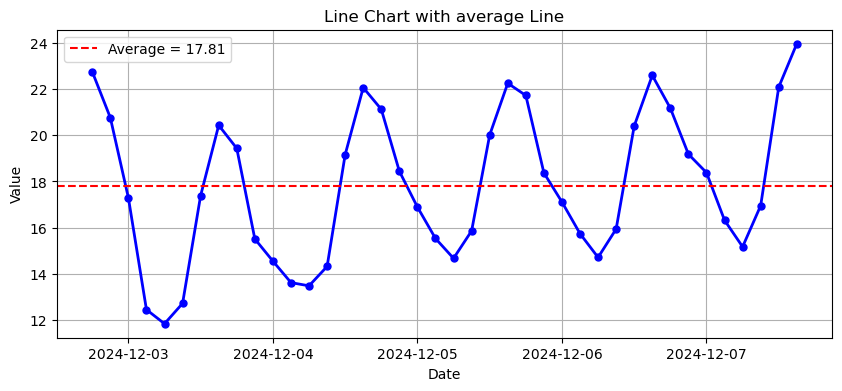

In [43]:
plt.figure(figsize = (10,4))
plt.plot(df['DateTime'], df['Tempeture'], color = 'b', linestyle = '-', linewidth = 2, marker = 'o', markersize = 5)
plt.axhline(y = average_value, color = 'r', linestyle = '--', label = f'Average = {average_value:.2f}')
plt.title('Line Chart with average Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

### 5.- Plot average tempeture per hour for the nex couple of days

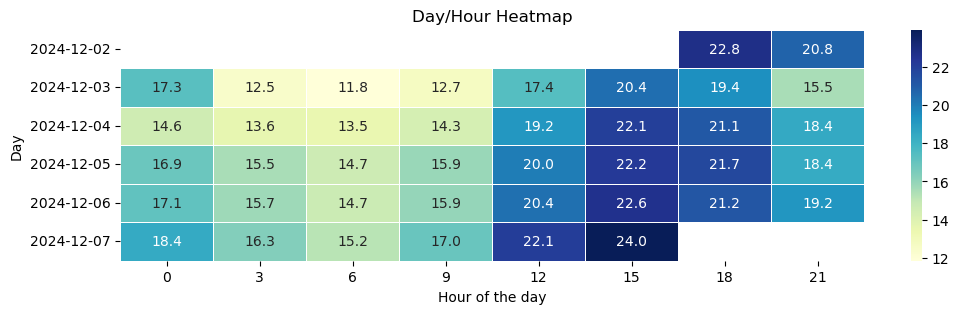

In [46]:
plt.figure(figsize = (12, 3))
sns.heatmap(df_pivot, cmap = 'YlGnBu', annot = True, fmt = '.1f', linewidth = .5)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the day')
plt.ylabel('Day')
plt.show()

### 6.- Loading infor to PostgreSQL DB

In [57]:
# DB Credentials

db_username = 'postgres'
db_password = ''
db_host = 'localhost'
db_port = 5432
db_name = 'postgres'

In [58]:
# Connect using SQLAlchemy engine
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

In [60]:
# Create a table
table_name = 'weather_values'

# Load data into the table
df.to_sql(table_name, engine, if_exists = 'replace', index = False)

# Close the engine connection
engine.dispose()